# 5

## a. Random walk

For Standard Brownian Motion, $B_{t+s}-B_s \sim N(0,(t+s)-s), \\ \forall B_0 = 0, \ 0<t_1<...<t_n,B_{t_1}-B_0,...,B{t_n}-B{t_{n-1}} are \ independent, \\ B_t \ is \ a \ continuous \ function \ of \ t \ on \ [0,T]$   
   
   
$\Rightarrow d(B_{t_j}) = B_{t_j} - B_{t_{j-1}} = \sqrt{\Delta t}N(0,1)$

In [1]:
#We start the script by initializing parameters
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

T = 1.0
N = 501
dt = T/(N-1)

#create rv
B = [0] * N
dB = [0] * N
dB[0] = np.sqrt(dt) * np.random.randn()
B[0] = dB[0]

Because $d(B_{t_j}) = B_{t_j} - B_{t_{j-1}} = \sqrt{\Delta t}N(0,1) \\ \Rightarrow B_{t_j} = d(B_{t_j}) + B_{t_{j-1}}$

In [2]:
for j in range(1, N):
    dB[j] = np.sqrt(dt) * np.random.randn()
    B[j] = B[j-1] + dB[j]

This time create power of 2 and not power of 2 respectively 

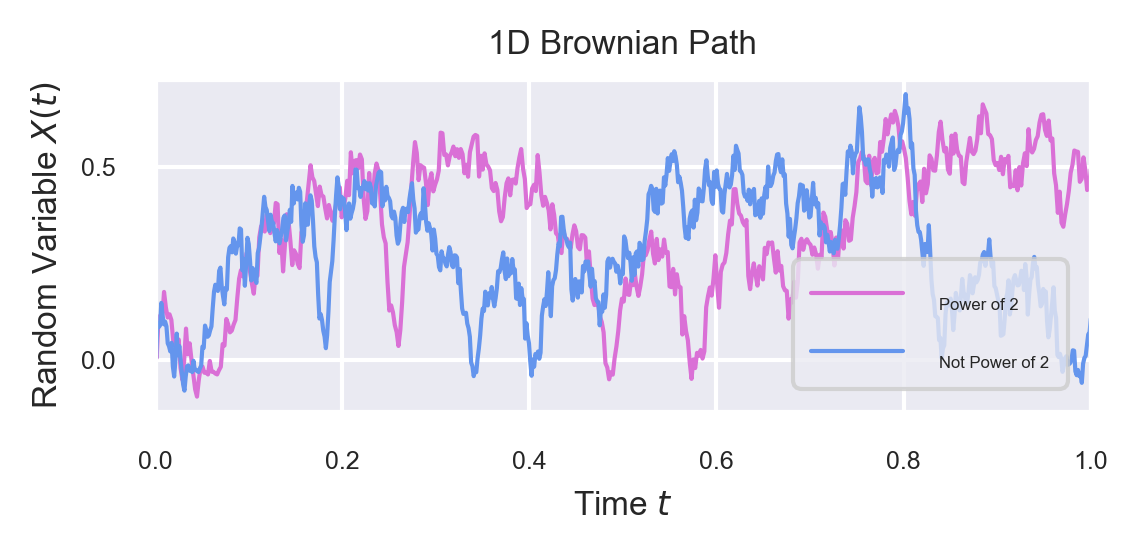

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#power of 2
np.random.seed(5)

T = 1
N = 2**9
dt = T/(N-1)
t = np.linspace(0,T,N)
dX = [0]*N 
X = [0]*N
dX[0] = np.sqrt(dt)*np.random.randn() # Eq. (3)
X[0] = dX[0]
for i in range(1,N):
    dX[i] = np.sqrt(dt)*np.random.randn() # Eq. (3)
    X[i] = X[i-1] + dX[i] # Eq. (4)


#power of 3
np.random.seed(5)
T = 1
N = 3**6
dtt = T/(N-1)
tt = np.linspace(0,T,N)
dY = [0]*N 
Y = [0]*N
dY[0] = np.sqrt(dtt)*np.random.randn() # Eq. (3)
Y[0] = dY[0]
for i in range(1,N):
    dY[i] = np.sqrt(dtt)*np.random.randn() # Eq. (3)
    Y[i] = Y[i-1] + dY[i] # Eq. (4)

#plot
sns.set_theme()
fig, ax = plt.subplots(figsize=(4,2))
sns.lineplot(t, X,color='orchid',linewidth=1,label='Power of 2')
sns.lineplot(tt, Y, color='cornflowerblue',linewidth=1,label='Not Power of 2')
plt.xlabel('Time $t$', fontsize=8)
plt.ylabel('Random Variable $X(t)$', fontsize=8)
plt.title('1D Brownian Path', fontsize=8)
axes = plt.gca()
axes.set_xlim([0,T])
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.setp(ax.get_legend().get_texts(), fontsize='4') # for legend text
plt.tight_layout()
plt.show()

-----------
## b. Brownian Bridge

根据题4的结果来生成，令$n=2^m,m\in \mathbb{Z}$，$n$表示数量，$b_0$表示出发点:

In [4]:
def Brown_brige(n, b0):
    B = np.zeros(n+1)
    #初始化
    B[0] = b0
    z = np.random.randn() 
    B[n] = np.sqrt(n) * z
    M = int(np.log2(n)) 
    h=n
    #生成矩阵
    A = np.zeros((n+1, n+1)) 
    A[n, 1] = np.sqrt(n)
    cnt = 1

    for k in range(1, M+1):
            h = h // 2
            for j in range(1, 2**(k-1)+1):
                z = np.random.randn()
                B[(2*j-1)*h] = (B[2*(j-1)*h] + B[2*j*h]) / 2 + np.sqrt(h/2) * z 
                #更新生成矩阵
                cnt += 1
                A[(2*j-1)*h, :] = (A[2*(j-1)*h, :] + A[2*j*h, :]) / 2
                A[(2*j-1)*h, cnt] += np.sqrt(h/2)
    return B, A

In [5]:
N = range(6, 12)
l= []
for n in N:
    m = 2**n
    l.append(m)

可以注意到X轴和Y轴的数字变化：

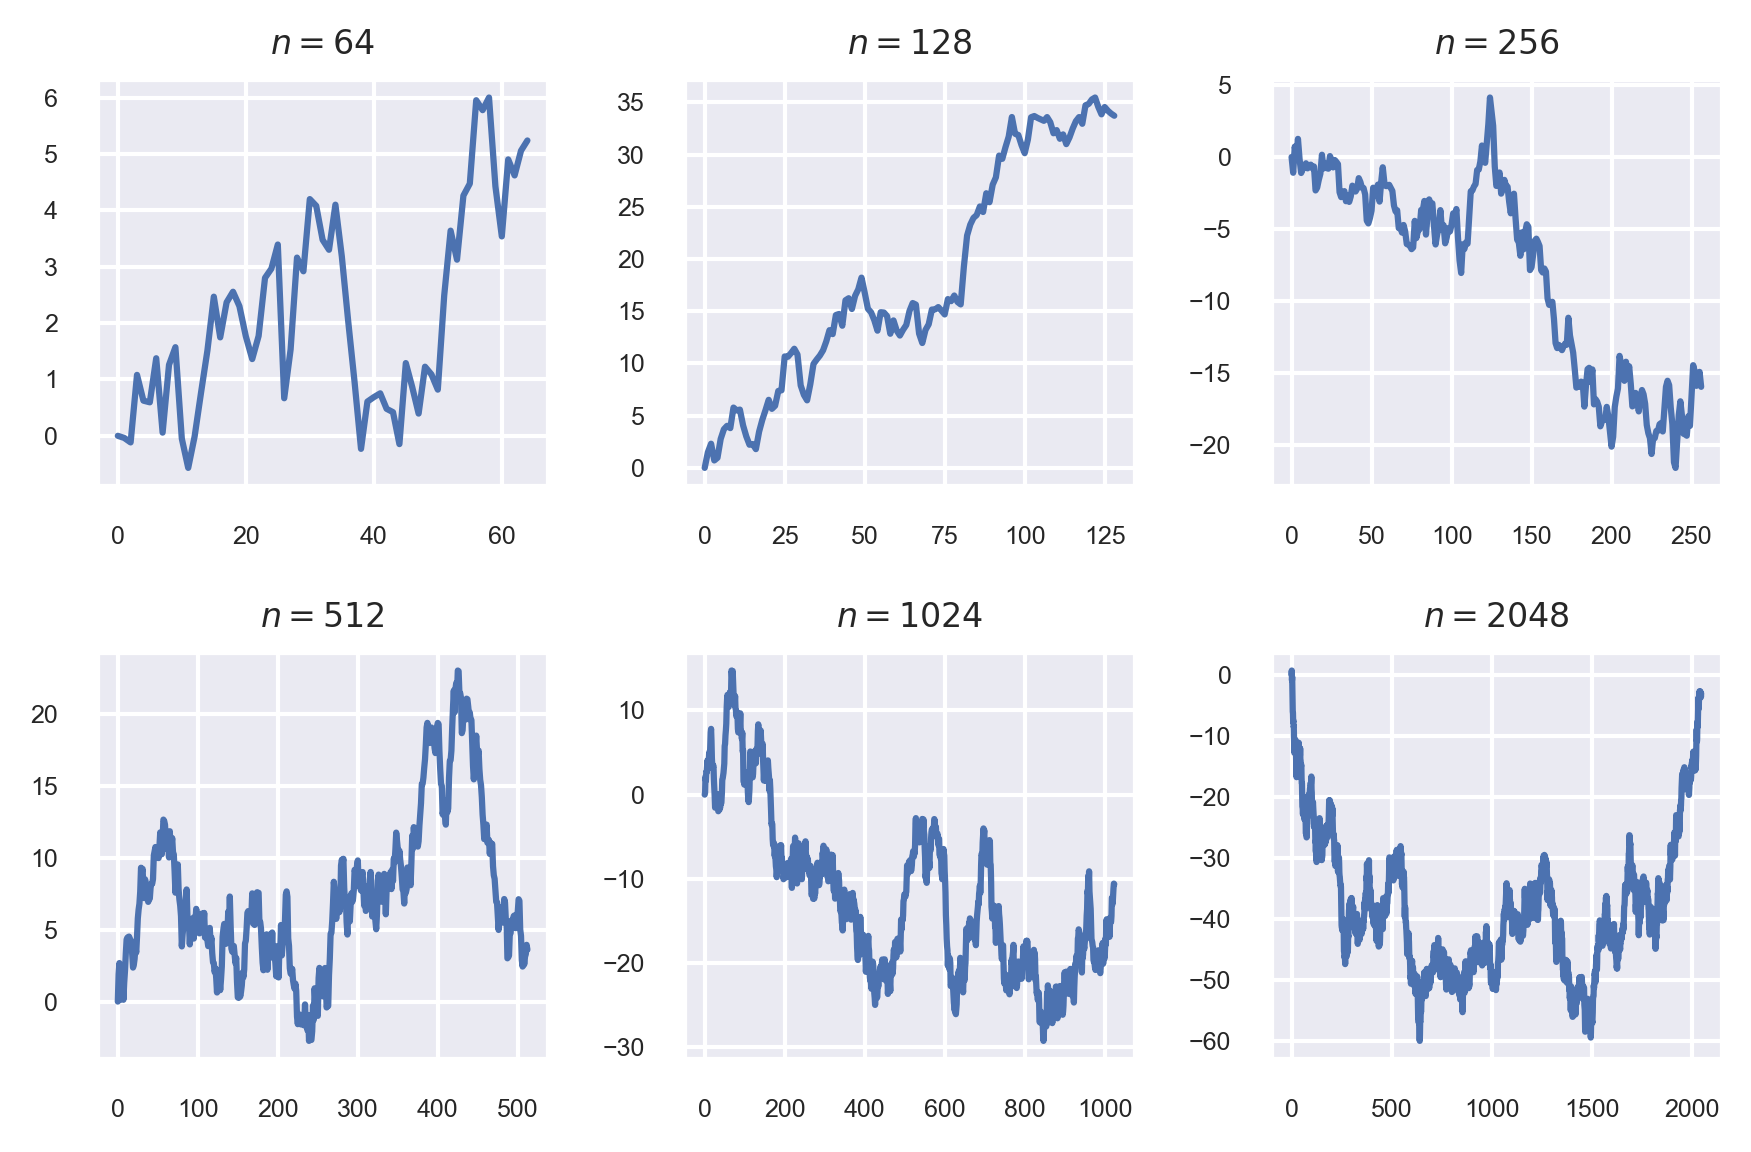

In [6]:
fig, ax = plt.subplots(2, 3)
ax[0,0].plot(Brown_brige(l[0], 0)[0])
ax[0,0].set_title("$n={}$".format(l[0]), size=8)
ax[0,0].tick_params(axis='both',labelsize = 6)
ax[0,1].plot(Brown_brige(l[1], 0)[0])
ax[0,1].set_title("$n={}$".format(l[1]), size=8)
ax[0,1].tick_params(axis='both',labelsize = 6)
ax[0,2].plot(Brown_brige(l[2], 0)[0])
ax[0,2].set_title("$n={}$".format(l[2]), size=8)
ax[0,2].tick_params(axis='both',labelsize = 6)
ax[1,0].plot(Brown_brige(l[3], 0)[0])
ax[1,0].set_title("$n={}$".format(l[3]), size=8)
ax[1,0].tick_params(axis='both',labelsize = 6)
ax[1,1].plot(Brown_brige(l[4], 0)[0])
ax[1,1].set_title("$n={}$".format(l[4]), size=8)
ax[1,1].tick_params(axis='both',labelsize = 6)
ax[1,2].plot(Brown_brige(l[5], 0)[0])
ax[1,2].set_title("$n={}$".format(l[5]), size=8)
ax[1,2].tick_params(axis='both',labelsize = 6)
fig.tight_layout()
plt.show()

若$n\neq 2^m,m\in \mathbb{Z}$，$\Rightarrow n = \sum_{i=1}^{k}2^{m_i}，m_i \geq m_j，i<j$:

得到如下算法:
- B=[], b=0
- 对i=1,...,k:
    - 计算$B_i=Brown_bridge(2^{m_i},b)$
    - 将$B_i$第二个元素开始的全部元素添加到$B$最后 
    - 令$b=B_i$最后一个元素

In [7]:
def to_2(n):
    res = []
    i=0
    while n != 0: 
        j=n%2
        if j:
            res.append(i)
        i += 1
        n = n // 2
    #反序输出
    return res[: : -1]

可以注意到X轴和Y轴的数字变化：

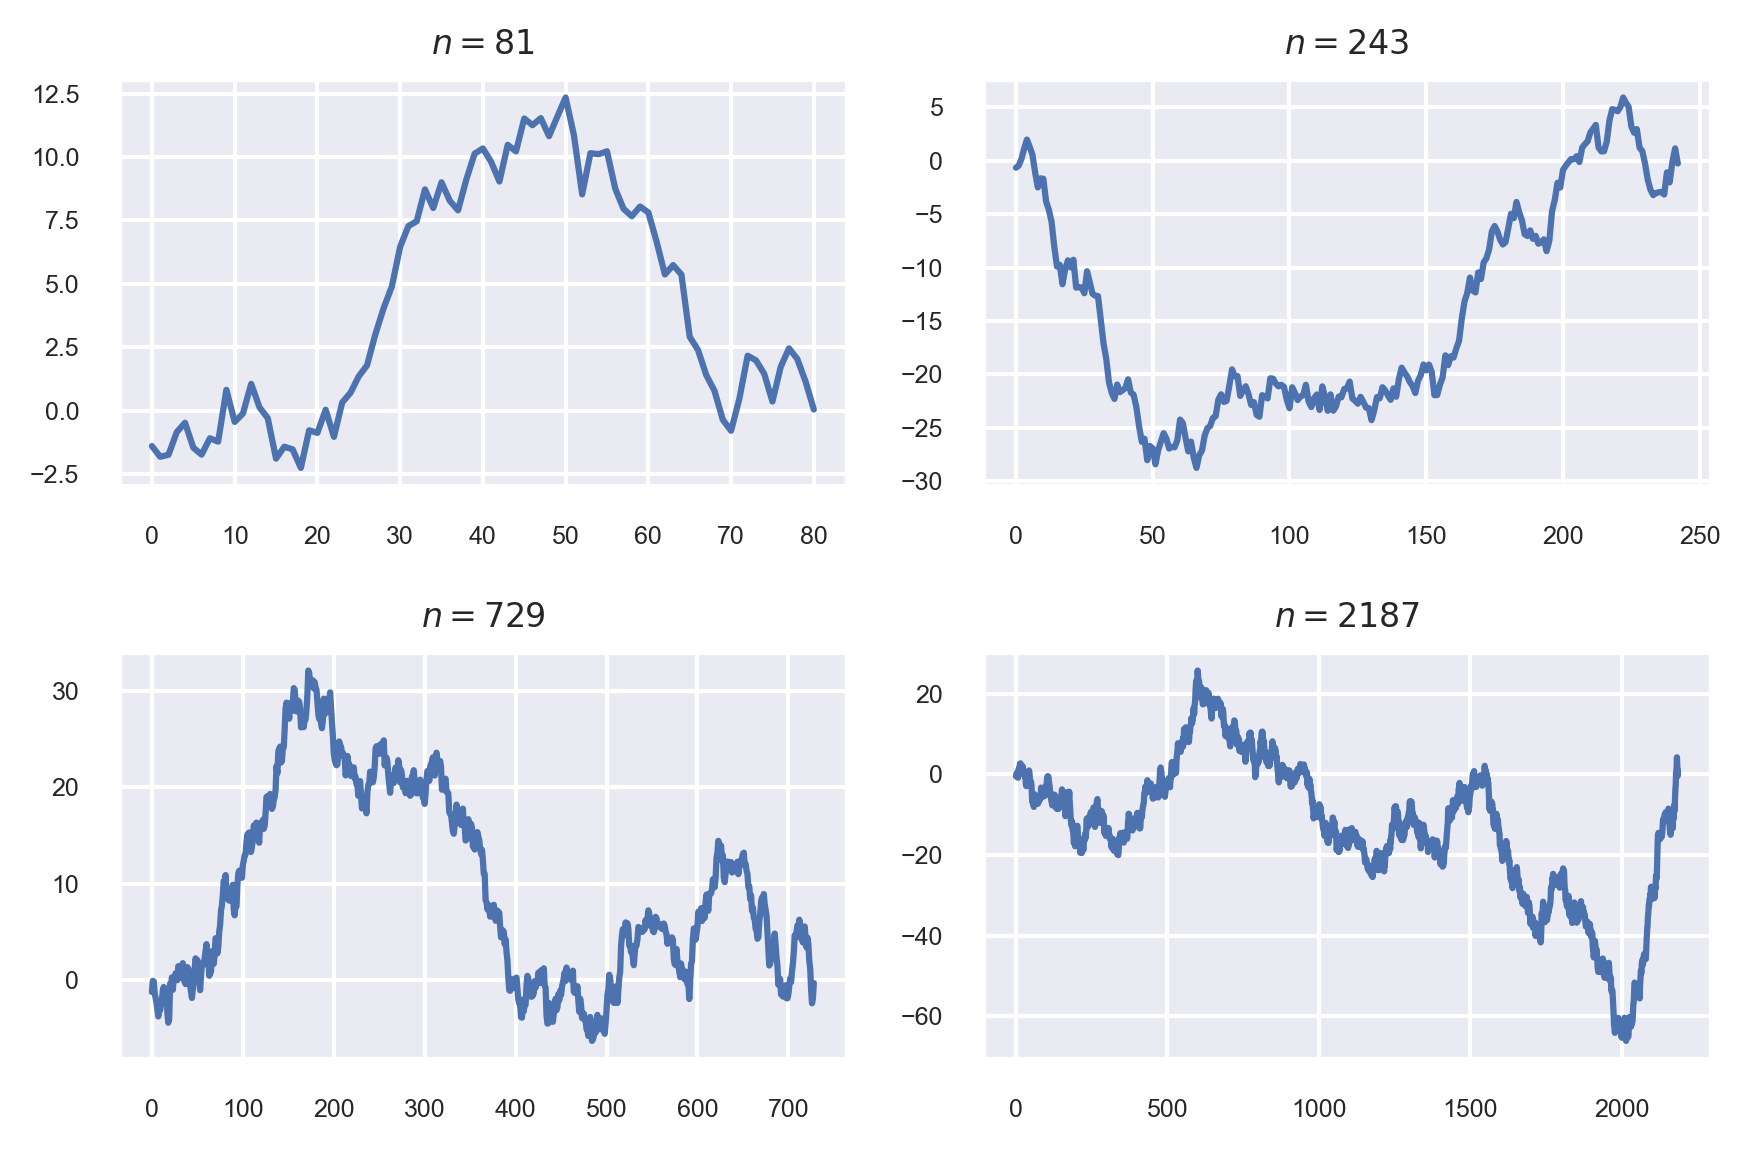

In [8]:
N = [3**4, 3**5, 3**6, 3**7]

fig, ax = plt.subplots(2, 2)
k = to_2(N[0])
B = np.array([])
b0 = 0
for i in k:
    m = 2 ** i
    Bi = Brown_brige(m, b0)[0]
    B = np.append(B, Bi[1:])
    b0 = Bi[-1]
ax[0,0].plot(B)
ax[0,0].set_title("$n={}$".format(N[0]), size=8)
ax[0,0].tick_params(axis='both',labelsize = 6)

k = to_2(N[1])
B = np.array([])
b0 = 0
for i in k:
    m = 2 ** i
    Bi = Brown_brige(m, b0)[0]
    B = np.append(B, Bi[1:])
    b0 = Bi[-1]
ax[0,1].plot(B)
ax[0,1].set_title("$n={}$".format(N[1]), size=8)
ax[0,1].tick_params(axis='both',labelsize = 6)

k = to_2(N[2])
B = np.array([])
b0 = 0
for i in k:
    m = 2 ** i
    Bi = Brown_brige(m, b0)[0]
    B = np.append(B, Bi[1:])
    b0 = Bi[-1]
ax[1,0].plot(B)
ax[1,0].set_title("$n={}$".format(N[2]), size=8)
ax[1,0].tick_params(axis='both',labelsize = 6)

k = to_2(N[3])
B = np.array([])
b0 = 0
for i in k:
    m = 2 ** i
    Bi = Brown_brige(m, b0)[0]
    B = np.append(B, Bi[1:])
    b0 = Bi[-1]
ax[1,1].plot(B)
ax[1,1].set_title("$n={}$".format(N[3]), size=8)
ax[1,1].tick_params(axis='both',labelsize = 6)

fig.tight_layout()
plt.show()

-------
# 7

已知$t_i=i\Delta t$
- random walk   
$\frac{\sum_{i=1}^{k}\mid \mid a_i^2\mid \mid}{\sum_{i=1}^{n}\mid \mid a_i^2\mid \mid} = \frac{\sum_{i=1}^{k}(n-i+1)(t_i-t_{i-1})}{\sum_{i=1}^{n}(n-i+1)(t_i-t_{i-1})}=\frac{(2n-k+1)k}{n(n+1)}$   
   
   
- PCA     
$\lambda_i = \frac{\Delta t}{4}sin^{-2}(\frac{2i-1}{2n+1}\frac{\pi}{2})$    
$\frac{\sum_{i=1}^{k}\mid \mid a_i^2\mid \mid}{\sum_{i=1}^{n}\mid \mid a_i^2\mid \mid} = \frac{\sum_{i=1}^{k}\lambda_i}{\sum_{i=1}^{n}\lambda_i} = \frac{\sum_{i=1}^{k}sin^{-2}(\frac{2i-1}{2n+1}\frac{\pi}{2})}{\sum_{i=1}^{n}sin^{-2}(\frac{2i-1}{2n+1}\frac{\pi}{2})}$

In [9]:
def RW(n):
    r1 = np.arange(n, 0, -1)
    r2 = np.cumsum(r1) / np.sum(r1)
    return r2

def PCA(n):
    angle = ((2 * np.arange(1, n+1)) - 1) * np.pi / 2 / (2 * n + 1)
    r1 = 1 / (np.sin(angle) ** 2)
    r2 = np.cumsum(r1) / np.sum(r1)
    return r2

def BB_var(A):
    r1 = np.sum(A ** 2, axis=0)[1:]
    r2 = np.cumsum(r1) / np.sum(r1)
    return r2

In [10]:
def show(n):
    r1 = RW(n)
    A = Brown_brige(256, 0)[1]
    r2 = BB_var(A)
    r3 = PCA(n)
    print("n = {}时".format(n)) 
    print("RW:", r1[:5]) 
    print("Brown_brige:", r2[:5]) 
    print("PCA:", r3[:5])

In [11]:
show(16)

n = 16时
RW: [0.11764706 0.22794118 0.33088235 0.42647059 0.51470588]
Brown_brige: [0.66796875 0.83399197 0.87550158 0.91701119 0.92739239]
PCA: [0.8119275  0.90268881 0.93576113 0.95294517 0.9635973 ]


In [12]:
show(64)

n = 64时
RW: [0.03076923 0.06105769 0.09086538 0.12019231 0.14903846]
Brown_brige: [0.66796875 0.83399197 0.87550158 0.91701119 0.92739239]
PCA: [0.81065825 0.90076701 0.93323183 0.94981518 0.95986297]


In [13]:
show(256)

n = 256时
RW: [0.0077821  0.0155338  0.02325511 0.03094601 0.03860652]
Brown_brige: [0.66796875 0.83399197 0.87550158 0.91701119 0.92739239]
PCA: [0.81057508 0.90064123 0.93306667 0.9496115  0.9596211 ]
